In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from tensorflow.keras.layers import Bidirectional,LSTM,Dense,Flatten
import math

In [361]:
df = pd.read_csv("AAPL.csv",index_col=False)

In [362]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,1/4/2010,7.622500,7.660714,7.585000,7.643214,493729600,6.535085
1,1/5/2010,7.664286,7.699643,7.616071,7.656429,601904800,6.546384
2,1/6/2010,7.656429,7.686786,7.526786,7.534643,552160000,6.442254
3,1/7/2010,7.562500,7.571429,7.466071,7.520714,477131200,6.430346
4,1/8/2010,7.510714,7.571429,7.466429,7.570714,447610800,6.473096


In [363]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,3021.000000,3021.000000,3021.000000,3021.000000,3.021000e+03,3021.000000
mean,42.698029,43.142652,42.260698,42.720728,2.702590e+08,40.877388
std,38.047906,38.498218,37.621622,38.084410,2.259517e+08,38.493790
min,6.870357,7.000000,6.794643,6.858929,4.100000e+07,5.864508
25%,18.523571,18.651787,18.345358,18.537500,1.096348e+08,16.185181
50%,28.264999,28.552500,27.992500,28.262501,1.842204e+08,26.030403
75%,48.105000,48.615002,47.787498,48.185001,3.707320e+08,46.525414
max,181.119995,182.130005,178.529999,180.330002,1.880998e+09,179.836319


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3021 non-null   object 
 1   Open       3021 non-null   float64
 2   High       3021 non-null   float64
 3   Low        3021 non-null   float64
 4   Close      3021 non-null   float64
 5   Volume     3021 non-null   int64  
 6   Adj Close  3021 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 165.3+ KB


In [365]:
fig = go.Figure(data=go.Scatter(x=df['Date'],y=df['Adj Close'], mode='lines'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Adj Close")
fig.show()

In [366]:
fig = go.Figure(data=go.Scatter(x=df['Date'],y=df['Volume'], mode='lines'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Volume")
fig.show()

In [367]:
train = df.iloc[:2116,1:7].values
test = df.iloc[2116:,-1].values

In [368]:
test = test.reshape(-1,1)
sc = MinMaxScaler(feature_range = (-1,1))
train_scaled = sc.fit_transform(train)
test_scaled = sc.fit_transform(test)

In [369]:
# Creating empty sets
x_train = []
y_train = []
WS = 5
# extract values for each change sesonality to predict next value
for i in range(WS,len(train_scaled)):
  x_train.append(train_scaled[i-WS:i,0:1])
  y_train.append(train_scaled[i,0])
# converting list to array
x_train,y_train = np.array(x_train), np.array(y_train)

#developing LSTM MODEL
model = Sequential()

model.add(LSTM(64,return_sequences=True,input_shape=(WS,1)))
model.add(LSTM(32,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss = 'mean_squared_error', metrics=['mse', 'mae'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 5, 64)             16896     
                                                                 
 lstm_24 (LSTM)              (None, 32)                12416     
                                                                 
 dense_20 (Dense)            (None, 25)                825       
                                                                 
 dense_21 (Dense)            (None, 1)                 26        
                                                                 
Total params: 30,163
Trainable params: 30,163
Non-trainable params: 0
_________________________________________________________________


In [370]:
history = model.fit(x_train,y_train,epochs=200,batch_size=32,validation_split=0.1)

Epoch 1/200
60/60 [==============================] - 5s 26ms/step - loss: 0.0249 - mse: 0.0249 - mae: 0.0947 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.1048
Epoch 2/200
60/60 [==============================] - 1s 9ms/step - loss: 8.3711e-04 - mse: 8.3711e-04 - mae: 0.0217 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0516
Epoch 3/200
60/60 [==============================] - 1s 9ms/step - loss: 8.2632e-04 - mse: 8.2632e-04 - mae: 0.0213 - val_loss: 0.0053 - val_mse: 0.0053 - val_mae: 0.0578
Epoch 4/200
60/60 [==============================] - 1s 10ms/step - loss: 7.9577e-04 - mse: 7.9577e-04 - mae: 0.0209 - val_loss: 0.0048 - val_mse: 0.0048 - val_mae: 0.0548
Epoch 5/200
60/60 [==============================] - 1s 9ms/step - loss: 7.9080e-04 - mse: 7.9080e-04 - mae: 0.0208 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0480
Epoch 6/200
60/60 [==============================] - 1s 9ms/step - loss: 8.0505e-04 - mse: 8.0505e-04 - mae: 0.0208 - val_loss: 0.0034 - val_mse: 0.003

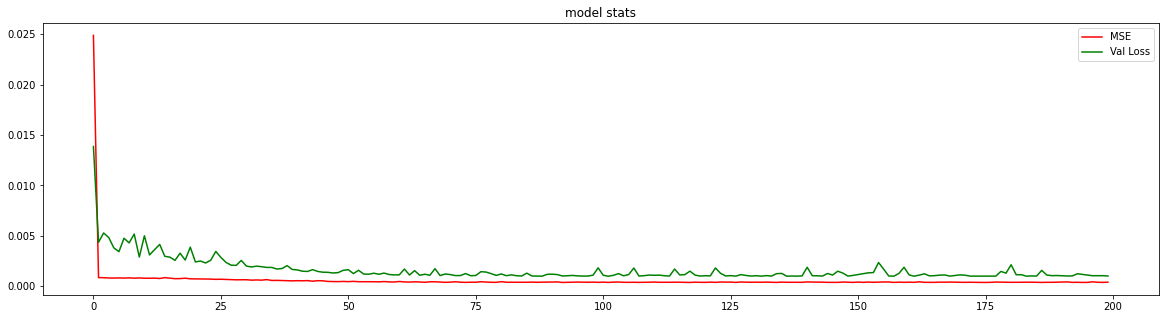

In [371]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(history.history['loss'], color = 'red' , label = 'MSE')
plt.plot(history.history['val_loss'], color = 'green' , label = 'Val Loss')
plt.title('model stats')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend()
plt.show()

In [372]:
dates = df.iloc[2116:,0]
print(dates)

2116     5/31/2018
2117      6/1/2018
2118      6/4/2018
2119      6/5/2018
2120      6/6/2018
           ...    
3016    12/27/2021
3017    12/28/2021
3018    12/29/2021
3019    12/30/2021
3020    12/31/2021
Name: Date, Length: 905, dtype: object


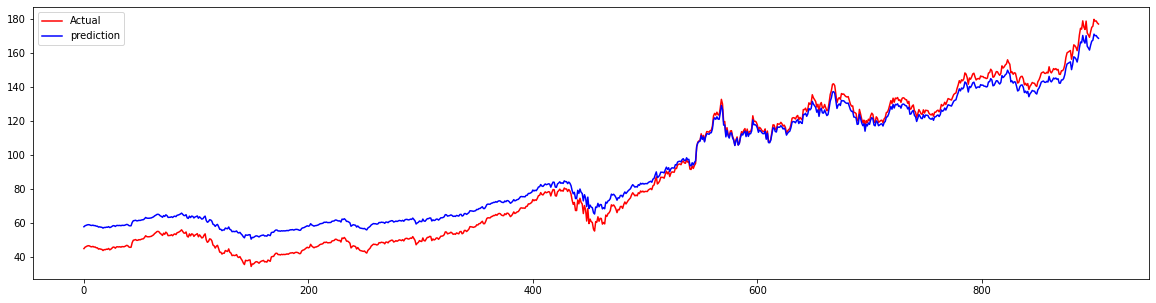

In [373]:
prediction_scaled= model.predict(test_scaled)
prediction = sc.inverse_transform(prediction_scaled)
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(test, color='red',label='Actual')
plt.plot(prediction , color='blue',label='prediction')
plt.legend()
plt.show()

In [374]:
fig = go.Figure(data=go.Scatter(x=dates,y=prediction.flatten(), mode='lines'))
fig.update_xaxes(title_text="Dates")
fig.update_yaxes(title_text="Prediction")
fig.show()

In [375]:
RMSE = math.sqrt(mean_squared_error(test,prediction))
print('RMSE:'+str(RMSE))
MAE = mean_absolute_error(test,prediction)
print('MAE:'+str(MAE))

RMSE:8.493502343113539
MAE:7.335378631985391
